In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob
from concurrent.futures import ProcessPoolExecutor, as_completed

import numpy as np
import pandas as pd

import settings as conf
import metadata
from utils import is_number, chunker
from results.multixcan import MXPhenoInfo, MXPhenoResults

# Load fastENLOC alpha1, se data

In [3]:
# this read stats from old fastENLOC runs (with no shrinkage)
# fastenloc_stats_filename = os.path.join(conf.ANALYSES_DIR, f'fastenloc-alpha1-stats.pkl.xz')

# this read stats from fastENLOC results with shrinkage applied
fastenloc_stats_filename = os.path.join(conf.ANALYSES_DIR, f'fastenloc-alpha1-stats-v2.pkl.xz')
display(fastenloc_stats_filename)

'/mnt/phenomexcan_base/analyses/fastenloc-alpha1-stats-v2.pkl.xz'

In [4]:
fastenloc_stats = pd.read_pickle(fastenloc_stats_filename)

In [5]:
fastenloc_stats.shape

(198401, 8)

In [6]:
fastenloc_stats.head()

,tissue,trait,alpha0,alpha0_se,alpha1,alpha1_se,alpha1_shrinkage,alpha1_shrinkage_se
0,Adipose_Subcutaneous,O46,-12.544,0.181,-14.486,4880.497,-0.0,1.0
1,Adipose_Visceral_Omentum,O46,-12.549,0.182,-14.398,5137.845,-0.0,1.0
2,Adrenal_Gland,O46,-12.553,0.182,-14.527,6584.453,-0.0,1.0
3,Artery_Aorta,O46,-12.547,0.182,-14.459,5361.933,-0.0,1.0
4,Artery_Coronary,O46,-12.555,0.182,-14.534,7127.824,-0.0,1.0


# Plots

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## alpha1 (shrinkage)

In [11]:
fastenloc_stats['alpha1_shrinkage'].describe()

count    198401.000000
mean          0.491256
std           1.298403
min          -0.098000
25%          -0.000000
50%          -0.000000
75%          -0.000000
max           7.396000
Name: alpha1_shrinkage, dtype: float64

In [88]:
fastenloc_stats['alpha1_shrinkage'].median()

0.0

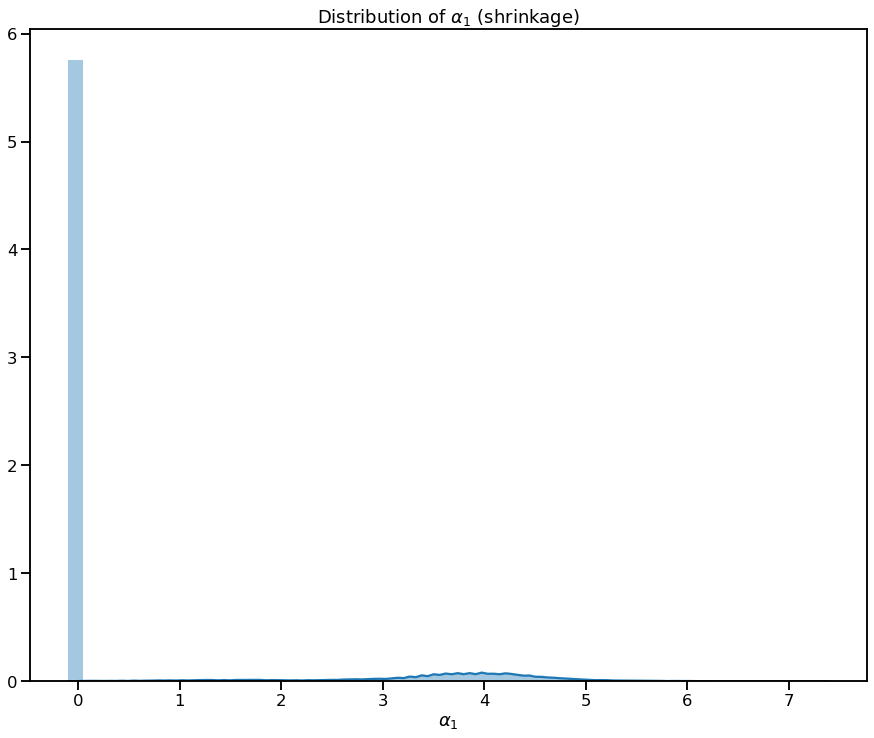

In [10]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats['alpha1_shrinkage'])
    ax.set_title(r'Distribution of $\alpha_1$ (shrinkage)')
    ax.set_xlabel(r'$\alpha_1$')

In [89]:
fastenloc_stats['alpha1_shrinkage_se'].describe()

count    198401.000000
mean          0.914022
std           0.229007
min           0.073000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: alpha1_shrinkage_se, dtype: float64

In [90]:
fastenloc_stats['alpha1_shrinkage_se'].median()

1.0

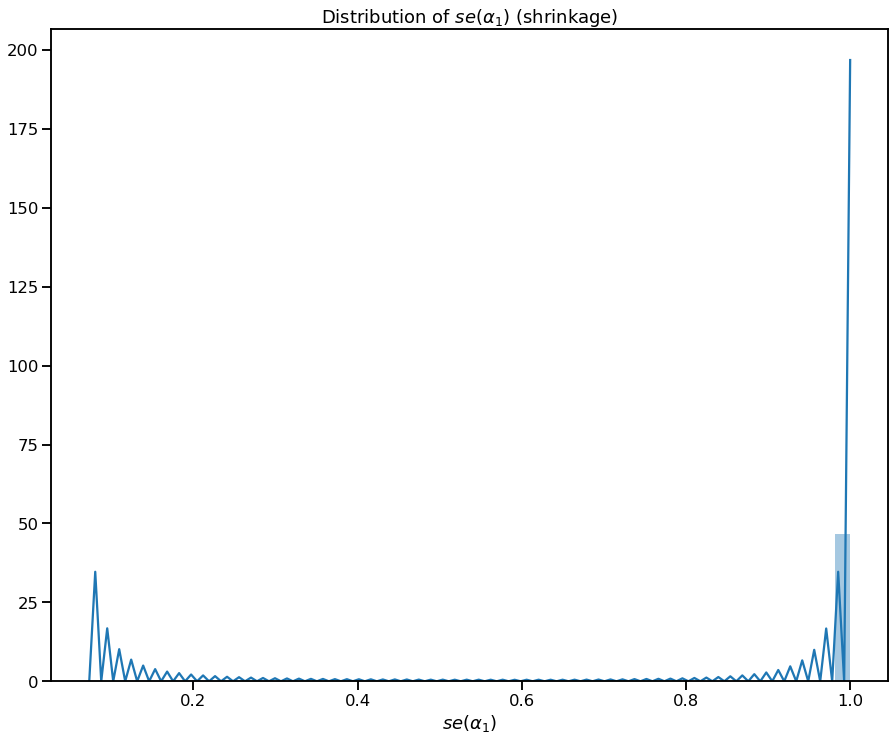

In [15]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats['alpha1_shrinkage_se'])
    ax.set_title(r'Distribution of $se(\alpha_1$) (shrinkage)')
    ax.set_xlabel(r'$se(\alpha_1)$')

## alpha1 (likelihood)

In [12]:
fastenloc_stats['alpha1'].describe()

count    198401.000000
mean         -9.583488
std           7.084651
min         -15.185000
25%         -14.402000
50%         -13.658000
75%          -6.627000
max          18.301000
Name: alpha1, dtype: float64

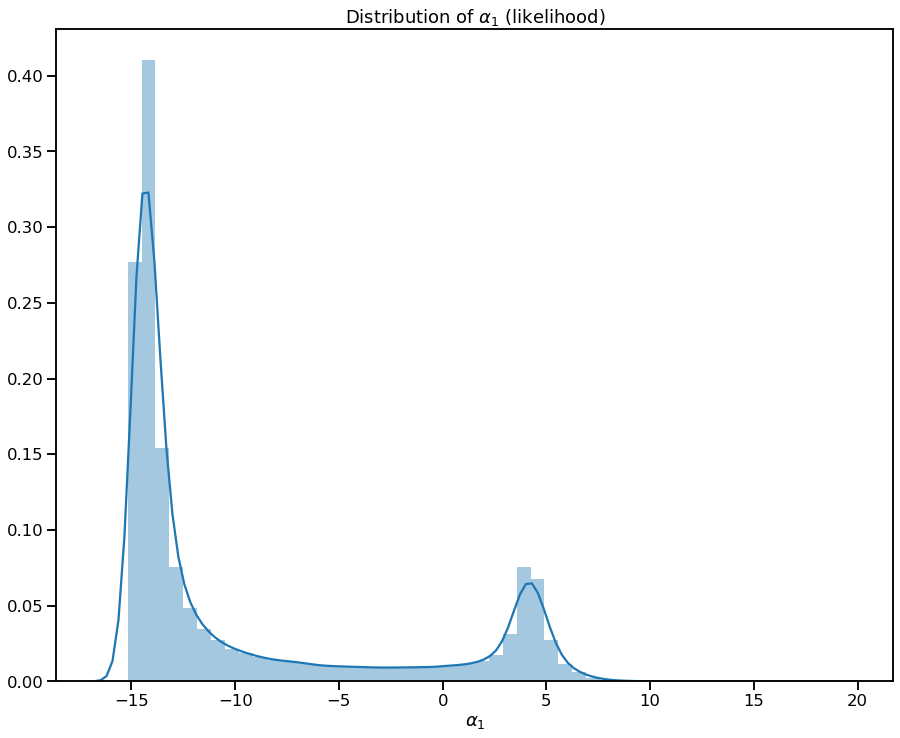

In [13]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats['alpha1'])
    ax.set_title(r'Distribution of $\alpha_1$ (likelihood)')
    ax.set_xlabel(r'$\alpha_1$')

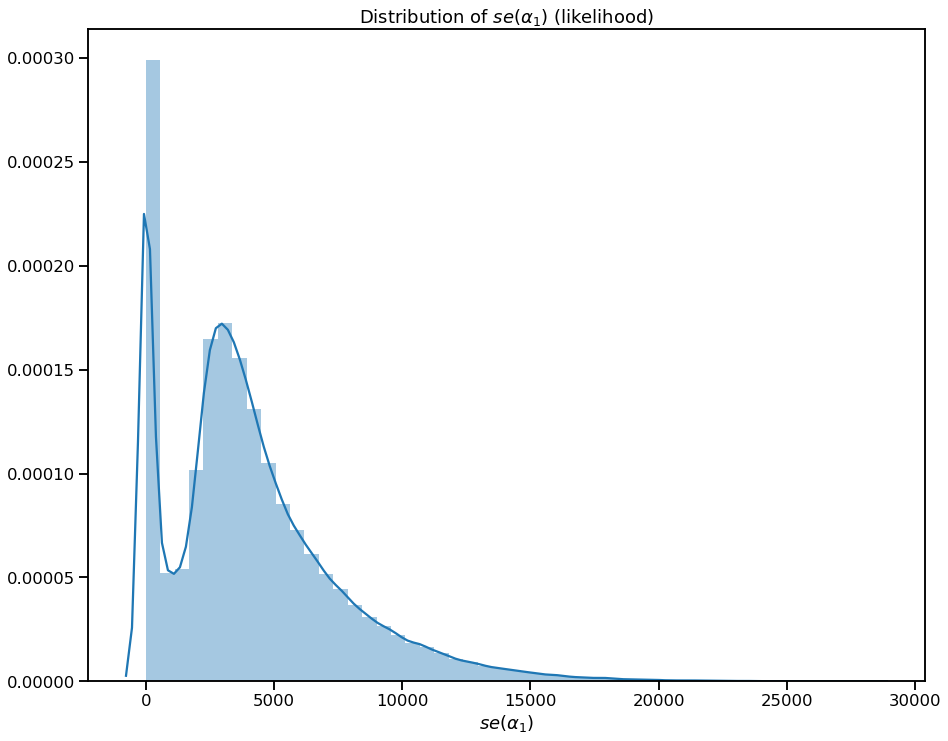

In [14]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats['alpha1_se'])
    ax.set_title(r'Distribution of $se(\alpha_1$) (likelihood)')
    ax.set_xlabel(r'$se(\alpha_1)$')

## Distribution of se for alpha1_shrinkage == 0 and > 1

In [30]:
alpha1_limit = 0.5

In [31]:
fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] < alpha1_limit]['alpha1_shrinkage_se'].describe()

count    171465.000000
mean          0.999834
std           0.004945
min           0.590000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: alpha1_shrinkage_se, dtype: float64

In [32]:
fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] >= alpha1_limit]['alpha1_shrinkage_se'].describe()

count    26936.000000
mean         0.367770
std          0.202149
min          0.073000
25%          0.203000
50%          0.317000
75%          0.493000
max          0.964000
Name: alpha1_shrinkage_se, dtype: float64

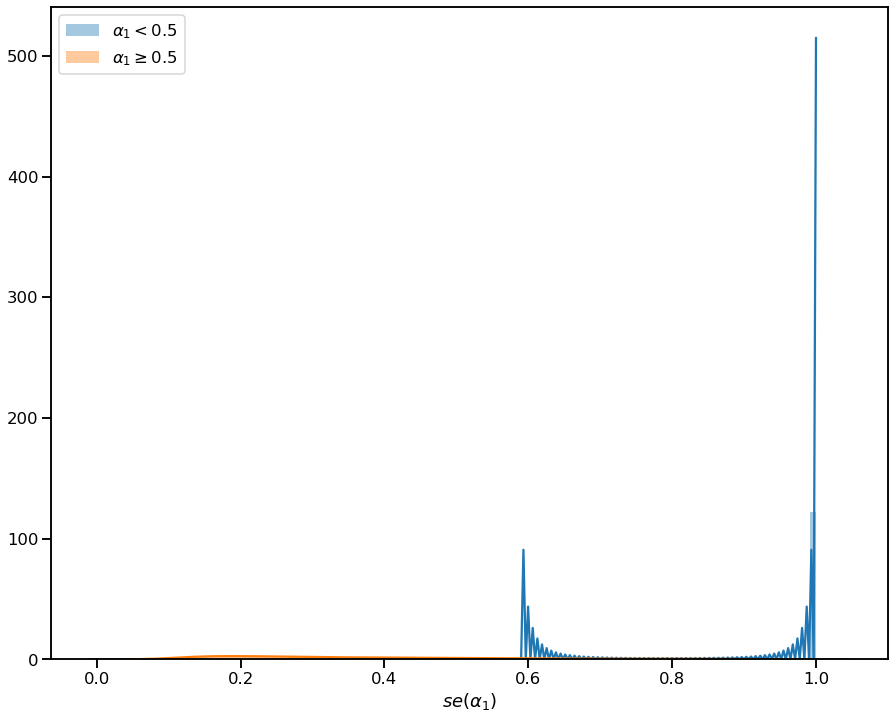

In [91]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] < alpha1_limit]['alpha1_shrinkage_se'], label=r'$\alpha_1 < ' + str(alpha1_limit) + r'$', ax=ax)
    ax = sns.distplot(fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] >= alpha1_limit]['alpha1_shrinkage_se'], label=r'$\alpha_1 \geq ' + str(alpha1_limit) + r'$', ax=ax)
    ax.legend()
    ax.set_xlabel(r'$se(\alpha_1)$')

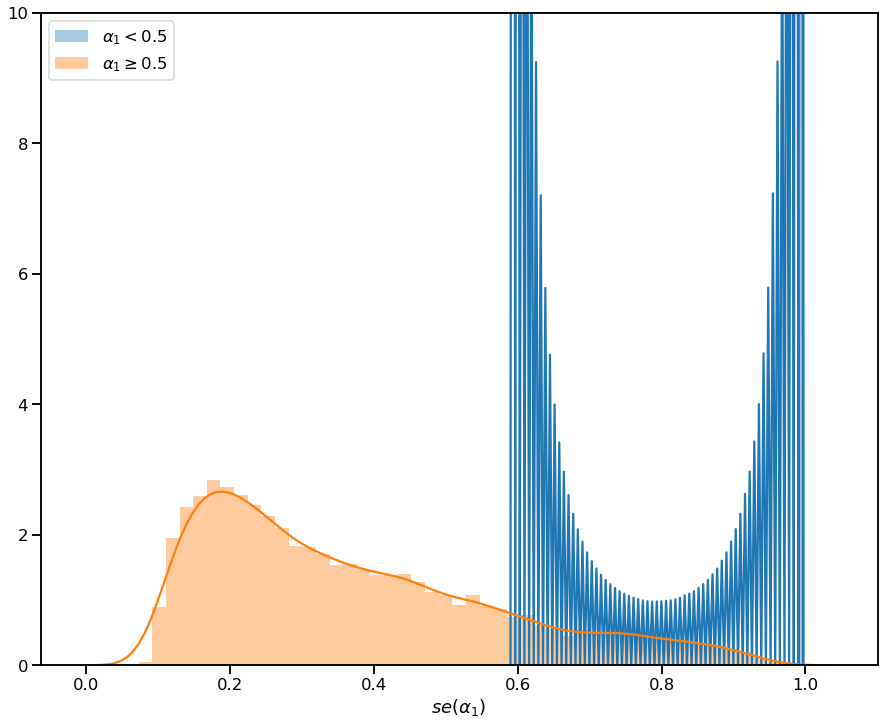

In [92]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] < alpha1_limit]['alpha1_shrinkage_se'], label=r'$\alpha_1 < ' + str(alpha1_limit) + r'$', ax=ax)
    ax = sns.distplot(fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] >= alpha1_limit]['alpha1_shrinkage_se'], label=r'$\alpha_1 \geq ' + str(alpha1_limit) + r'$', ax=ax)
    ax.legend()
#     ax.set_xlim(0, 5000)
    ax.set_ylim(0, 10)
    ax.set_xlabel(r'$se(\alpha_1)$')

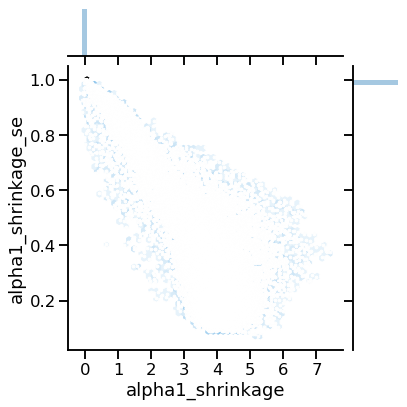

In [87]:
with sns.plotting_context('talk'):
    #fig, ax = plt.subplots(figsize=(15, 12))
    g = sns.jointplot(x="alpha1_shrinkage", y="alpha1_shrinkage_se", data=fastenloc_stats, kind="hex", bins='log')
    g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker=".")
    #g.ax_joint.collections[0].set_alpha(0.0)
#     sns.scatterplot(data=fastenloc_stats, x='alpha1_shrinkage', y='alpha1_shrinkage_se')

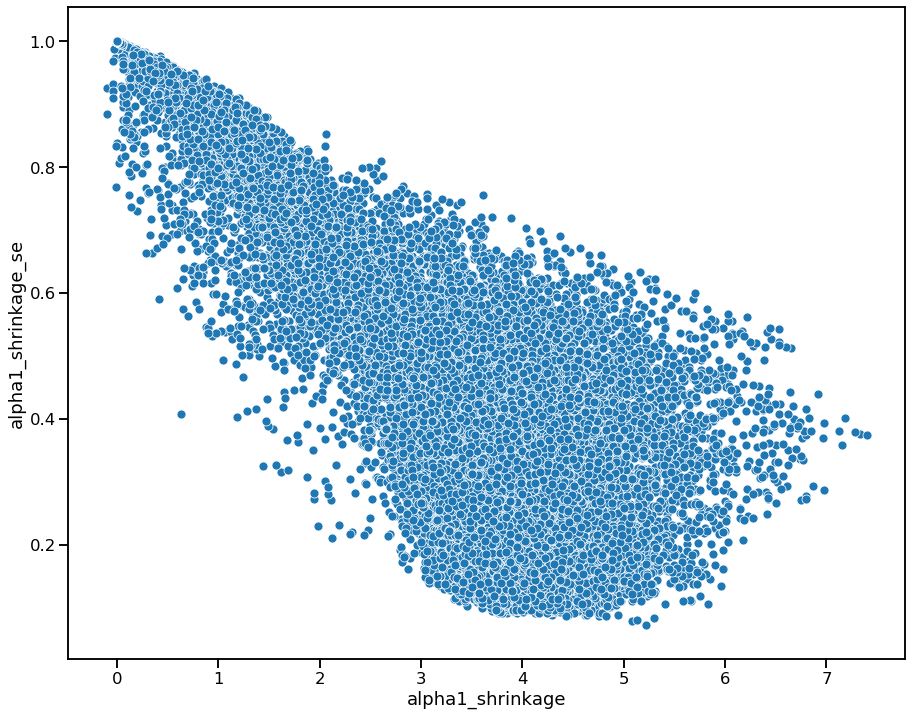

In [76]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.scatterplot(data=fastenloc_stats, x='alpha1_shrinkage', y='alpha1_shrinkage_se')

In [98]:
fastenloc_stats[['alpha1_shrinkage', 'alpha1_shrinkage_se']].describe()

,alpha1_shrinkage,alpha1_shrinkage_se
count,198401.000000,198401.000000
mean,0.491256,0.914022
std,1.298403,0.229007
min,-0.098000,0.073000
25%,-0.000000,1.000000
50%,-0.000000,1.000000
75%,-0.000000,1.000000
max,7.396000,1.000000


In [96]:
fastenloc_stats[fastenloc_stats['alpha1_shrinkage_se'] < 0.95][['alpha1_shrinkage', 'alpha1_shrinkage_se']].describe()

,alpha1_shrinkage,alpha1_shrinkage_se
count,27093.000000,27093.000000
mean,3.595396,0.370605
std,1.088616,0.205025
min,-0.098000,0.073000
25%,3.175000,0.204000
50%,3.789000,0.319000
75%,4.271000,0.497000
max,7.396000,0.949000


In [97]:
fastenloc_stats[fastenloc_stats['alpha1_shrinkage'] > 0.1][['alpha1_shrinkage', 'alpha1_shrinkage_se']].describe()

,alpha1_shrinkage,alpha1_shrinkage_se
count,27236.000000,27236.000000
mean,3.578397,0.373831
std,1.110696,0.209227
min,0.103000,0.073000
25%,3.158000,0.204000
50%,3.784500,0.320000
75%,4.268000,0.500000
max,7.396000,0.992000


In [106]:
fastenloc_stats[(fastenloc_stats['alpha1_shrinkage'] > 0.01) & (fastenloc_stats['alpha1_shrinkage_se'] < 0.99)].shape

(27259, 8)

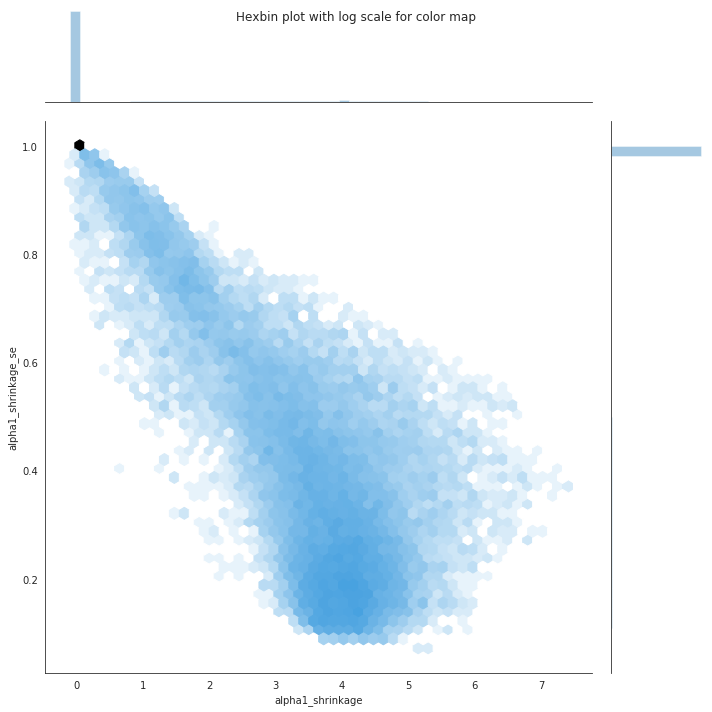

In [103]:
with sns.axes_style("white"):
    ax = sns.jointplot(data=fastenloc_stats, x='alpha1_shrinkage', y='alpha1_shrinkage_se', height=10, kind='hex', bins='log')
#     ax.ax_joint.set_xlim([0, 1])
#     ax.ax_joint.set_ylim([0.9, 1])
#     ax.ax_joint.plot([0.0, 1.0], [0.0, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'Hexbin plot with log scale for color map')

## Distribution of se for negative and positive alpha1

The plots below make sense only for the first runs of fastENLOC (no shrinkage)

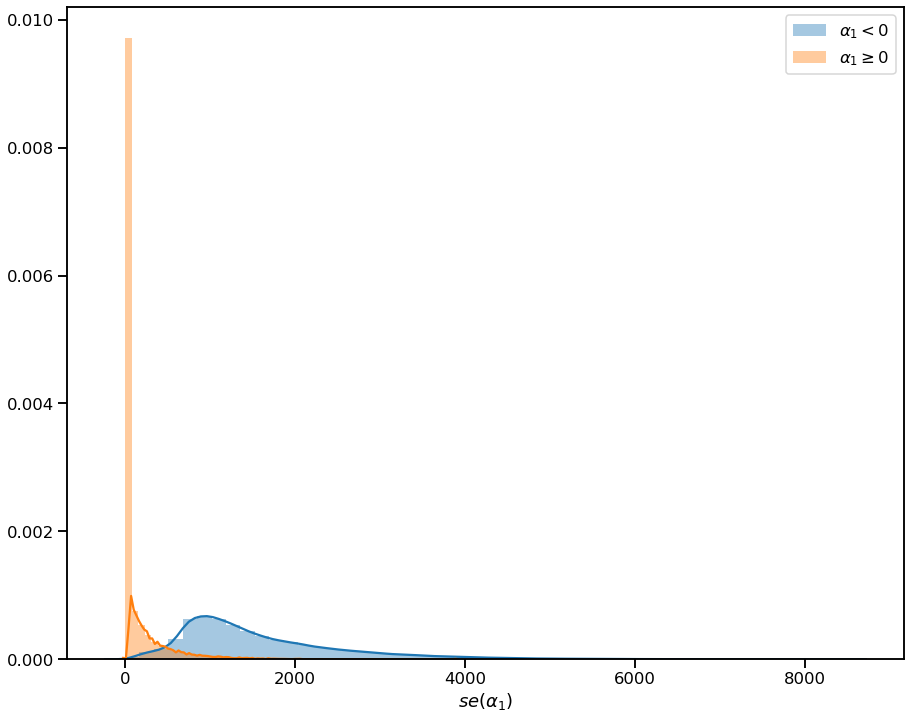

In [10]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] < 0]['se'], label=r'$\alpha_1 < 0$', ax=ax)
    ax = sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] >= 0]['se'], label=r'$\alpha_1 \geq 0$', ax=ax)
    ax.legend()
    ax.set_xlabel(r'$se(\alpha_1)$')

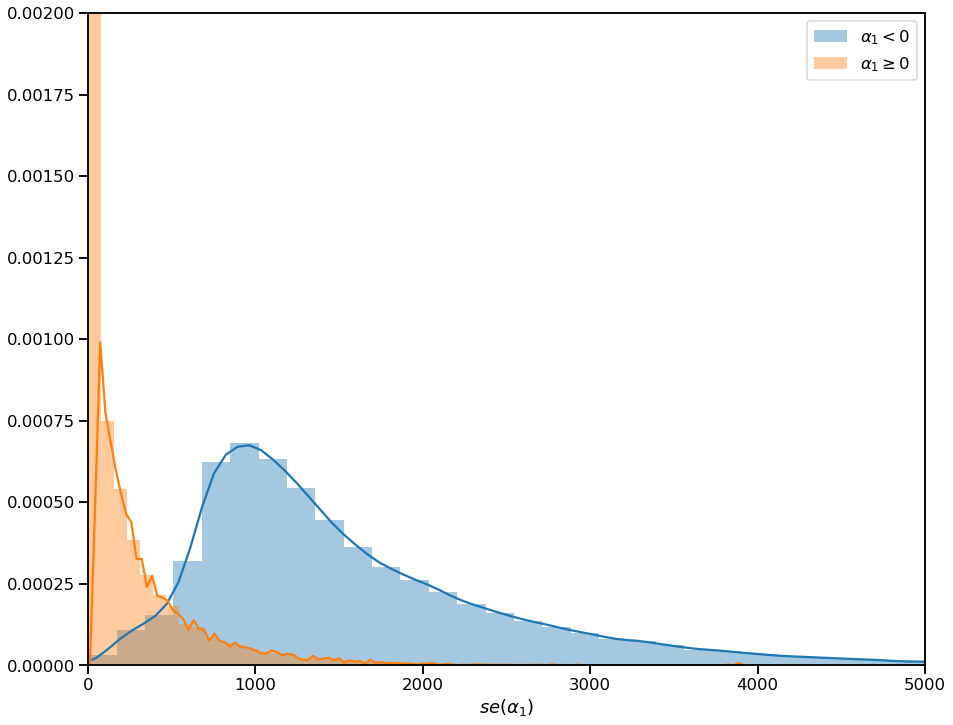

In [11]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] < 0]['se'], label=r'$\alpha_1 < 0$', ax=ax)
    ax = sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] >= 0]['se'], label=r'$\alpha_1 \geq 0$', ax=ax)
    ax.legend()
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 0.002)
    ax.set_xlabel(r'$se(\alpha_1)$')